# IMU experiment

In the following experiment, you will get to know about inertial measurement unit (IMU), which is very common in our daily life. One vivid example is our smartphone. By containing an IMU, a smartphone can thus count your foot steps when you are walking or running. You can read more about IMU in [this article](https://en.wikipedia.org/wiki/Inertial_measurement_unit), or the given supplementary material.

***Let's start our trip with IMU***

### A. Raw data from IMU (10 points)

In this experiment, you will learn how to collect the raw data from IMU to do some analysis. The data is stored in a text file, where each line contains the following information:
```three-axis acceleration (m/s^2), three-axis angular velocity (rad/s), three-axis magnetic field```
By reading the supplementary material, you are able to understand the meaning of each data. You need to visualize that data and do a simple analysis.

##### A.1. Read the data from your phone (2 points)

You need to collect the data from your phone. You can use HyperIMU, if you use an Android phone, or you can use app to collect the data and export it, if you use iPhone. The data should contains the following information:
```three-axis acceleration (m/s^2), three-axis angular velocity (rad/s), three-axis magnetic field```

In [1]:
# if you have an Android phone, you can use the following command to get the IMU data
# the app is called "HyperIMU"
# you need to choose accelerometer, gyroscope and magnetometer to acquire the data
# and set the sampling rate to 100Hz
# you can find the detailed processes in the supplementary material
import socket
import numpy as np

class Receiver:

    def __init__(self):
        super().__init__()
        self.HOST = ''   # use '' to expose to all networks
        self.PORT = 2055

    def receive(self):
        """Open specified port and return file-like object"""
        
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        sock.bind((self.HOST, self.PORT))
        sock.listen(0)
        request, addr = sock.accept()
        return request.makefile('r')

In [3]:
# It is highly recommended to put your phone in a stable position at the very beginning,
# as we will use this time period to calculate the initial orientation,
# the noise covarriances, and thus eliminate the gravity.

r = Receiver()

data = []

for line in r.receive():
    data.append(line.split(','))

data = np.array(data, dtype = np.float)

# by now, you have collected a group of IMU data from your android phone

/var/folders/hr/l8ctjl7j5xq6mdkgl55c1qh80000gn/T/ipykernel_85748/3235310955.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.array(data, dtype = np.float)


In [ ]:
# if you have an iPhone, you can use an APP called "phyphox" to collect the data
# after you have collected the data, you can export the data to a xls file
# and read the data from the xls file
# you need to choose accelerometer, gyroscope and magnetometer to acquire the data
# and set the sampling rate to 100Hz
# you can find the detailed processes in the supplementary material

In [2]:
import xlrd

data = []

# read the data from the xls file
workbook = xlrd.open_workbook("moving trajectory.xls")
acceleration = workbook.sheet_by_index(0)
acceleration_values = []
gyroscope = workbook.sheet_by_index(1)
gyroscope_values = []
magnetometer = workbook.sheet_by_index(2)
magnetometer_values = []

In [3]:
for i in range(acceleration.nrows - 1):
	acceleration_values.append(acceleration.row_values(i + 1))

for i in range(gyroscope.nrows - 1):
	gyroscope_values.append(gyroscope.row_values(i + 1))

for i in range(magnetometer.nrows - 1):
	magnetometer_values.append(magnetometer.row_values(i + 1))

# combine the data from the three sensors
data = []

length = min(len(acceleration_values), len(gyroscope_values), len(magnetometer_values))
acceleration_values = acceleration_values[-length:]
gyroscope_values = gyroscope_values[-length:]
magnetometer_values = magnetometer_values[-length:]
for j in range(length):
	temp = []
	temp.extend(acceleration_values[j])
	temp.extend(gyroscope_values[j])
	temp.extend(magnetometer_values[j])
	data.append(temp)

data = np.array(data, dtype = np.float)

/var/folders/hr/l8ctjl7j5xq6mdkgl55c1qh80000gn/T/ipykernel_31462/903647231.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.array(data, dtype = np.float)


##### A.2. Initialize and analyze the data (3 points)

To obtain the initial state of the IMU, you have to put your phone on a flat surface and keep it still for a while. You need to calculate the mean value of the acceleration from three-axis, and further calculate the standard gavity at your place. Also, the varriance of acceleration, angular velocity and magnetic field should be calculated.

In [4]:
# Initialization
# discard the first and last few readings
# for some reason they fluctuate a lot

# sampling rate
dt = 0.01    # s

# the initialization interval
ts = 0.5    # s

In [7]:
# normalized vector
def normalized(x):
    try:
        return x / np.linalg.norm(x)
    except:
        return x

# you may need to change the second dimension slice
a = data[10:-10, 1:4]
w = data[10:-10, 5:8]
m = data[10:-10, 9:12]

if(np.shape(a)[0] < ts/dt):
    print("not enough data for initialization!")

# gravity
# calculate the average initial acceleration from three axes
gn = a[:int(ts/dt)].mean(axis = 0)
gn = -gn[:, np.newaxis]
print('acc mean: ', gn.T)
g0 = np.linalg.norm(gn)  # save the initial magnitude of gravity
print('The initial magnitude of gravity is: ', g0)

# magnetic field
mn = m[:int(ts/dt)].mean(axis = 0)
mn = normalized(mn)[:, np.newaxis]  # magnitude is not important

avar = a[:int(ts/dt)].var(axis=0)
wvar = w[:int(ts/dt)].var(axis=0)
mvar = m[:int(ts/dt)].var(axis=0)
print('acc var: ', avar, ', ', np.linalg.norm(avar))
print('ang var: ', wvar, ', ', np.linalg.norm(wvar))
print('mag var: ', mvar, ', ', np.linalg.norm(mvar))

# cut the initialization data
w = w[int(ts/dt):] - w[:int(ts/dt)].mean(axis=0)
a = a[int(ts/dt):]
m = m[int(ts/dt):]

# sampling numbers
sample_number = np.shape(a)[0]

acc mean:  [[ 0.03973936 -0.30827195 -9.84334316]]
The initial magnitude of gravity is:  9.848249358363448
acc var:  [4.07015613e-05 3.61515197e-05 1.49062620e-04] ,  0.00015869219896355716
ang var:  [8.73398461e-07 5.83472237e-07 8.86103811e-07] ,  1.3742069303756562e-06
mag var:  [0.00879523 0.01132067 0.00862139] ,  0.016728478831555753


##### A.3. Visualize the data (5 points)

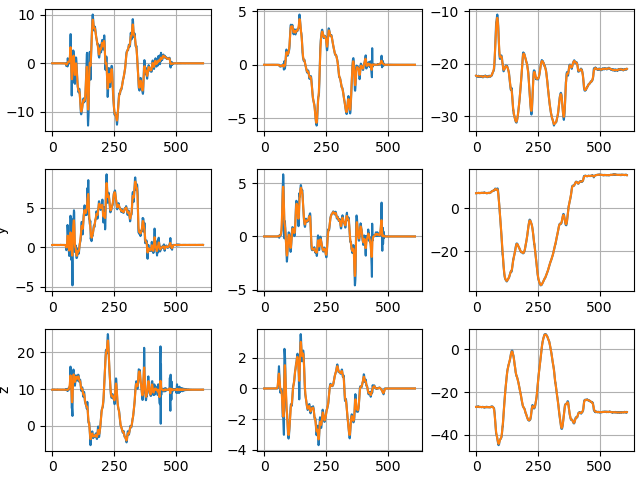

In [10]:
%matplotlib widget
np.set_printoptions(precision=8, suppress=True)

import scipy

# fill in the signal filting function
def filtSignal(data, dt=0.01, wn=10, btype='lowpass', order=1):
    # data: the data to be filtered
    # dt: sampling timeslot
    # wn: normalized cutoff frequency, the calculation formula is Wn=2*cutoff frequency/sampling frequency.
    # btype: lowpass, highpass, bandpass
    # order: the order of the filter
    # you can use scipy.signal.butter to design the filter
    # YOUR CODE HERE

    # END OF YOUR CODE
    return

# the filtered data
# to get the filtered data, you can use the following code for reference
# a_filtered, w_filtered, m_filtered = filtSignal((a, w, m), dt=dt, wn=10, btype='lowpass')
# plot the original and filtered acc, ang, mag
# YOUR CODE HERE

# END OF YOUR CODE

### B. Step counting (30 points)

As mentioned above, the IMU can be used to count the foot steps. In this part, you will use the raw data to count the foot steps. You can just count the peak points or the cross-zero points from the absolute value of acceleration. The comparison of the prediction results and the ground truth is required. The unprecise results are to be expected, as the IMU has certain bias.
You are acquired to print the raw data, and the filtered data (you can use a low-pass filter to filter the data) in a platform.

##### B.1. Calculate the absolute value of three-axis acceleration (10 points)

It is easy to calculate the absolute value of three-axis acceleration. A low-pass filter is required, as the walking cycle is about 300ms to 500ms.

In [11]:
# load the accelerometer data
step_acce = []

with open("acce.txt", "r") as f:
	for line in f.readlines():
		line = line.strip('\n')
		line = line.split(' ')
		line = [float(i) for i in line]
		step_acce.append(line)

step_acce = np.array(step_acce)

# load the step counting ground truth
step_count = []
with open("step.txt", "r") as f:
	for line in f.readlines():
		line = line.strip('\n')
		line = line.split(' ')
		line = [float(i) for i in line]
		step_count.append(line)

step_count = np.array(step_count)

In [12]:
start_time = min(step_acce[0][0], step_count[0][0])
print("start time is: ", start_time)

start time is:  4063392906584804.0


In [13]:
# calculate the relative time for the step count data

for i in range(len(step_acce)):
	step_acce[i][0] -= start_time

for i in range(len(step_count)):
	step_count[i][0] -= start_time

##### B.2. Count the foot steps (20 points)

You can just count the peak points or the cross-zero points from the absolute value of accelerations. It should be noticed that the part of data that starts and ends should not be considered.

In [14]:
# calculate the absolute acceleration value from three axes
acc = step_acce[:, 1:4]
abs_acc = np.linalg.norm(acc, axis=1)

# filter the acceleration data, as the frequency of walking is no more than 2Hz
abs_acc_filt = filtSignal(abs_acc, dt=dt, wn=2*2/200, btype='lowpass')


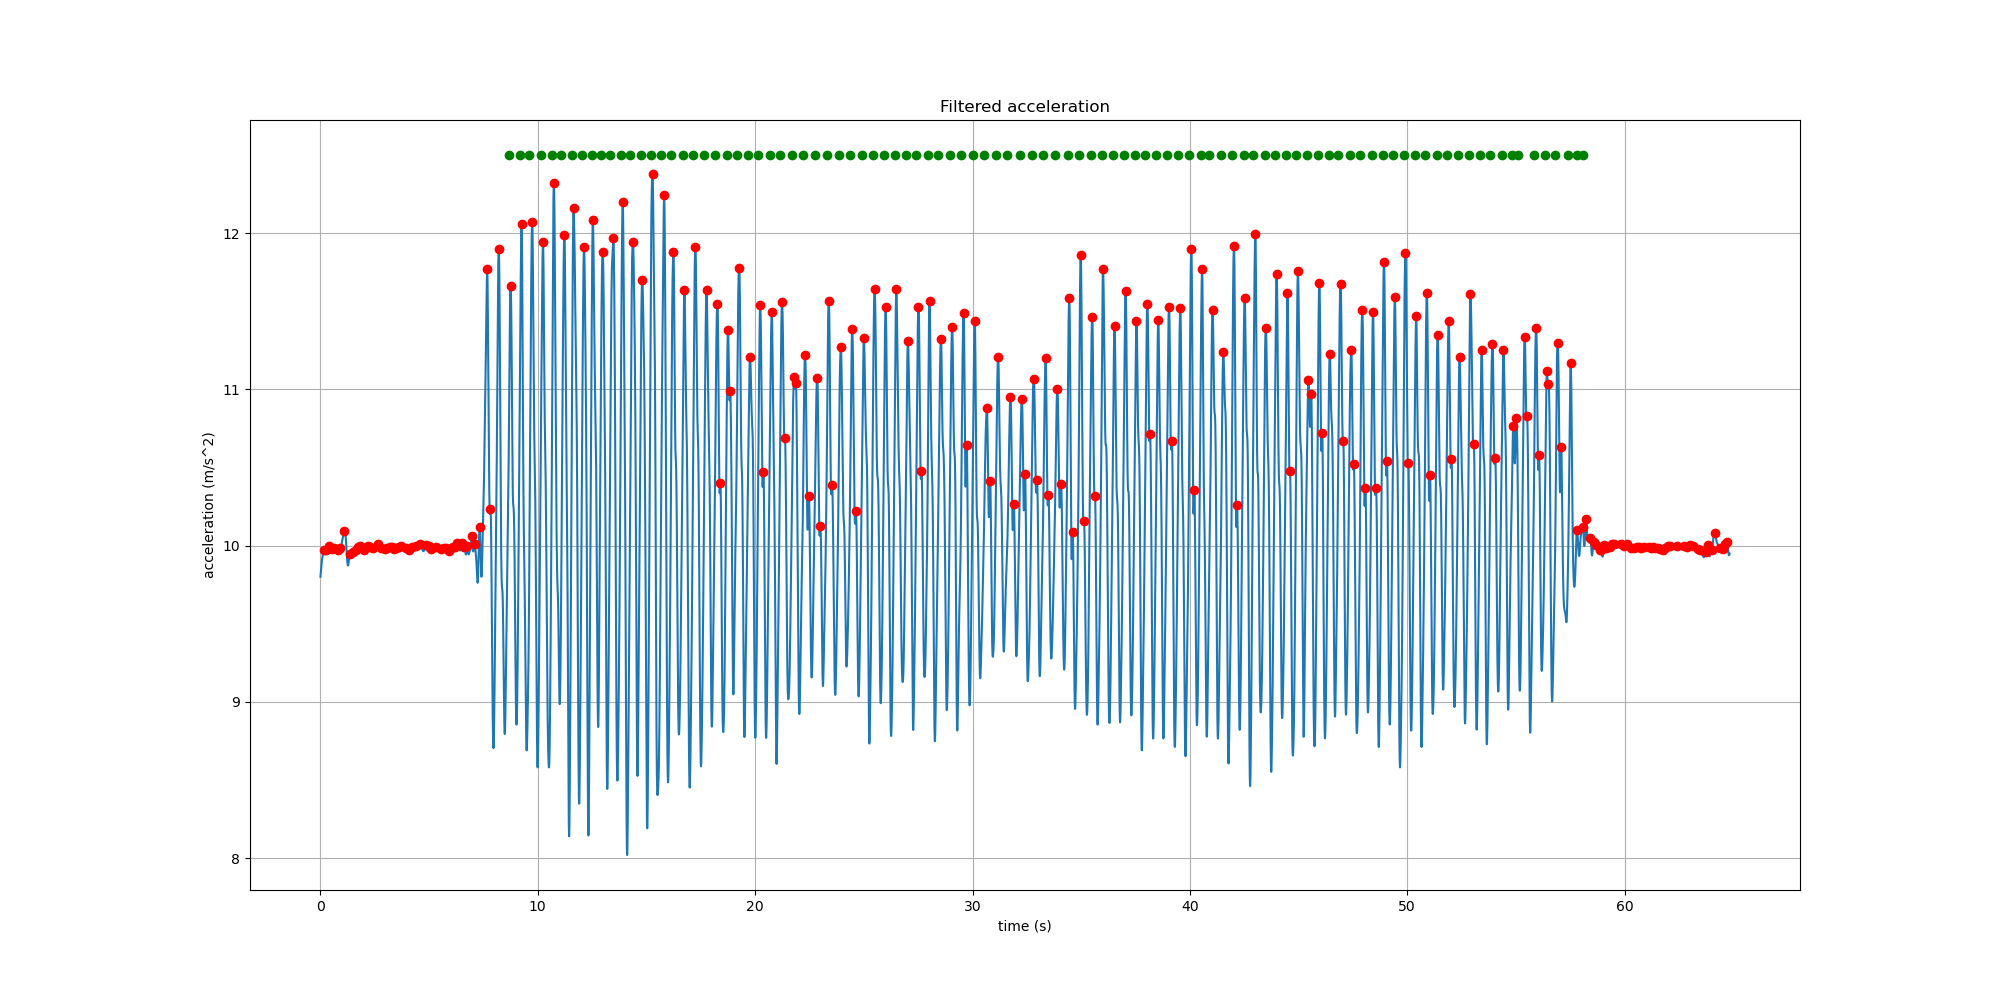

In [54]:
# please complete the code here to show the picture
# draw picture of the filtered acceleration (the blue line)

# draw dots peaks (red dots)

# draw dots from the step counts, which are ground truth (green dots)


In [ ]:
# find how many peaks are in the step count
step_count_peaks = signal.argrelextrema(abs_acc_filt, np.greater)[0]
# find the start point above threshold
start_point = 0
for i in range(len(abs_acc_filt)):
	if abs_acc_filt[i] > 10.5:
		start_point = i
		break

# find the end point below threshold
end_point = 0
for i in range(len(abs_acc_filt)):
	if abs_acc_filt[-1-i] > 10.5:
		end_point = len(abs_acc_filt) - i
		break

step_count_peaks = step_count_peaks[step_count_peaks > start_point]
step_count_peaks = step_count_peaks[step_count_peaks < end_point]
print("number of peaks in step count: ", len(step_count_peaks))
print("real number of steps: ", int(step_count[-1][1]))

### C. Moving trajectory (40 points)

In this part, you will use the raw data to calculate the moving trajectory of the IMU. By converting the IMU's own coordinate system to the ground coordinate system, the trajectory of a moving IMU can be cumulated with integral operation. You need to understand the concept of coordinate transformation and the concept of integral operation. You can refer to the supplementary material for more information. (It is common that the prediction results are quite different from what it should be like.)

##### C.1. Coordinate transformation (10 points)

You need to understand the basic principle of **Quaternions**, which is a very important concept in coordinate transformation. By filling the code in the given template, you can get the transformation matrix from IMU's coordinate system to the ground coordinate system. You are able to obtain the acceleration and orientation of IMU from global coordinate. If you are unable to finish the code, you can use the processed data to do the following analysis, but you will get less points.

The formula of state transfer matrix is given as:
$$
\textbf{I}_4+\frac{1}{2}\delta t \cdot \Omega(\omega_t)
$$
You can read the IMU tutorial.pdf for more detail.

In [1]:
# define the functions to calculate the cumulative position

import numpy as np
from numpy.linalg import norm
import scipy.signal

# unit matrix
def I(n):
    return np.eye(n)

# return the skew_symmetric matrix of a three dimension vector
def skew(x):

    x = x.T[0]
    return np.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

# rotation transformation matrix
# global frame to body frame as q is expected to be q^nb
# R(q) @ x to rotate x
def rotate(q):
    qv = q[1:4, :]
    qc = q[0]
    return (qc**2 - qv.T @ qv) * I(3) - 2 * qc * skew(qv) + 2 * qv @ qv.T

# state transfer matrix
def F(wt, dt):
    # you have to fill in this function and give the corresponding return value
    # YOUR CODE HERE

    # END OF YOUR CODE
    return

In [ ]:
# please get to know this part: how to transform from body frame to global frame
# trajectory calculation function

# acceleration and orientation in global frame
a_nav = []
orientations = []

# quaternian intialization
q = np.array([[1., 0., 0., 0.]]).T
# obtain the orientation in global frame
orin = -gn / np.linalg.norm(gn)

# update the quaternian based on angular velocities,
# and obtain the acceleration in global frame
t = 0
while t < sample_number:
    wt = w[t, np.newaxis].T
    at = a[t, np.newaxis].T

    # Propagation
    # rotation matrix from body frame to global frame
    Ft = F(wt, dt)

    # update quaternion
    q = Ft @ q
    q = normalized(q)

    # Measurement Update
    # Use only normalized measurements to reduce error!

    conj = -I(4)
    conj[0, 0] = 1
    # rotate the acceleration from body frame to global frame
    an = rotate(conj @ q) @ at + gn
    # obtain the orientation in global frame
    ori = rotate(conj @ q) @ orin

    a_nav.append(an.T[0])
    orientations.append(ori.T[0])

    t += 1

a_nav = np.array(a_nav)
orientations = np.array(orientations)


##### C.2. Acceleration correction (10 points)

You need to eliminate the bias or drift from the obtaind acceleration, and then print the corrected acceleration, along with the original acceleration.

In [28]:
# The sensitivity of the accelerometer is very high, therefore
# it is necessary to set a threshold value for it to detect the movement of the object.

a_threshold = 0.1

In [29]:
# find the start time and end time of the movement

t_start = 0
for t in range(sample_number):
    at = a_nav[t]
    if np.linalg.norm(at) > a_threshold:
        t_start = t
        break

t_end = 0
for t in range(sample_number - 1, -1,-1):
    at = a_nav[t]
    if np.linalg.norm(at - a_nav[-1]) > a_threshold:
        t_end = t
        break

In [30]:
# eliminate the drift of the acceleration

an_drift = a_nav[t_end:].mean(axis=0)
an_drift_rate = an_drift / (t_end - t_start)

for i in range(t_end - t_start):
    a_nav[t_start + i] -= (i+1) * an_drift_rate

for i in range(sample_number - t_end):
    a_nav[t_end + i] -= an_drift

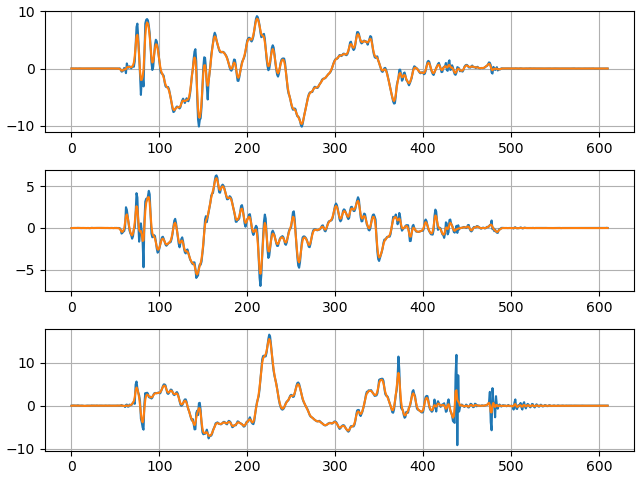

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [31]:
# you need to use a bandpass filter to filter the acceleration data
# here is a brief example of how to set the parameters of the filter
# you can change the parameters to get a better result
# and don't forget to give your reasons in your report
# filtered_a_nav, = filtSignal([a_nav], dt=dt, wn=(0.01, 15), btype='bandpass')

# plot the acceleration of three axes in global frame
# YOUR CODE HERE

# END OF YOUR CODE

##### C.3. Velocity update (10 points)

By integrating the corrected acceleration, you can get the velocity of the IMU. You are also acquired to print the velocity.

In [32]:
# please calculate the velocities of three axes in global frame

def velocity_int(filtered_a_nav):
    v = np.zeros((3, 1))
    velocities = []
    a_threshold = 0.1
    t = 0
    prevt = -1
    # static status
    still_phase = False
    sample_number = len(filtered_a_nav[0])

    while t < sample_number:
        at = filtered_a_nav[t, np.newaxis].T
        if np.linalg.norm(at) < a_threshold:
            if not still_phase:
                # integerate acceleration to obtain velocity
                # YOUR CODE HERE
                predict_v =
                # END OF YOUR CODE

                v_drift_rate = predict_v / (t - prevt)
                for i in range(t - prevt - 1):
                    velocities[prevt + 1 + i] -= (i + 1) * v_drift_rate.T[0]

            v = np.zeros((3, 1))
            prevt = t
            still_phase = True
        else:
            # integerate acceleration to obtain velocity
            # YOUR CODE HERE
            v =
            # END OF YOUR CODE
            still_phase = False
        t += 1
        velocities.append(v.T[0])
    return np.array(velocities)

velocites = velocity_int(filtered_a_nav)
# you can use some drift elimination methods to eliminate the drift of the velocity

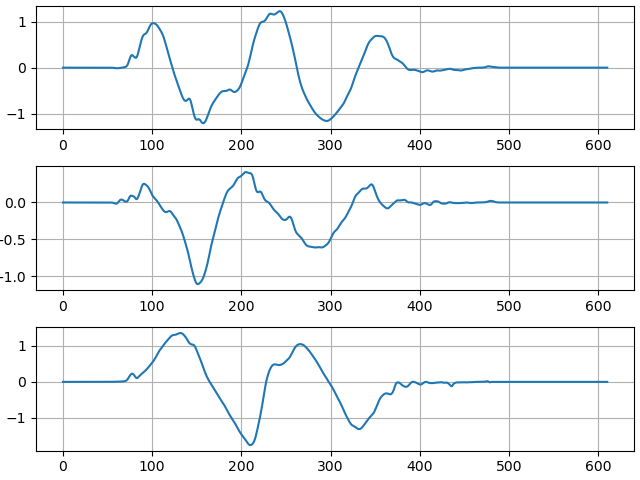

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [33]:
# plot the velocities of three axes in global frame
# YOUR CODE HERE

# END OF YOUR CODE

##### 4. Position update (10 points)

By integrating the velocity, and double integrating the acceleration, you can get the position of the IMU. You are also acquired to print the position.
You can use the following formula to obtain the positions of the IMU in the global coordinate system.
$$
\mathbf{p}(t+\delta t) = \mathbf{p}(t) + \mathbf{v}(t)*\delta t + \frac{1}{2}\mathbf{a}(t)*\delta t^2
$$

In [34]:
# please calculate the positions of three axes in global frame
def position_int(filtered_a_nav, velocities):
    # please fill in the code to calculate the position in global frame
    # YOUR CODE HERE

    # END OF YOUR CODE
    return positions

# please use the above function to obtain the positions of IMU in global frame
# YOUR CODE HERE

# END OF YOUR CODE

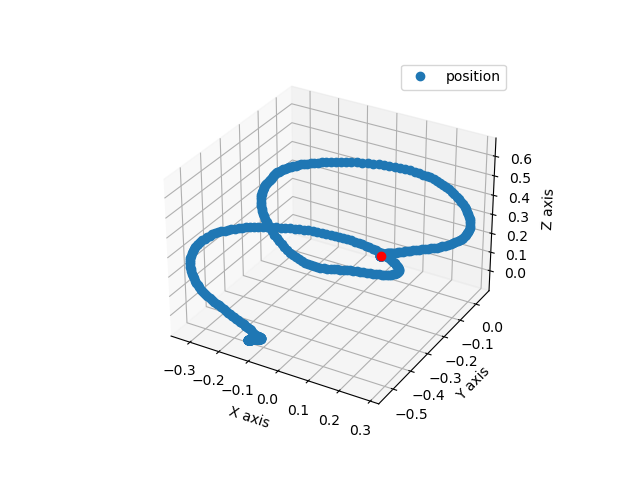

In [35]:
# plot the positions of three axes in global frame
# YOUR CODE HERE

# END OF YOUR CODE

**The above three experiments are fundamental and must be done by all of you. If you are not able to handle the extend experiment, which is the fourth part, it's OK to just finish three on them. And you will get almost 80 points if you do a good job.**

#### D. Extend experiment (bonus)

If we do not conduct additional processing on IMU data, the step counting prediction we make will be quite different from the ground truth. In the fourth part of the project, you may try some mature methods to improve the calculation of step count or moving trajectory. For example, machine learning, or some filter algorithms (Kalman filter, butterworth filter), if you're familiar with signal processing. It should be noticed that this part will be graded in terms of experimental completness and accuracy, as well as the cross-sectional comparison with other groups.

If we do not conduct additional processing on IMU data, the step counting prediction we make will be quite different from the ground truth. In the fourth part of the project, you may try some mature methods to improve the calculation of step count or moving trajectory. For example, machine learning, or some filter algorithms (Kalman filter, butterworth filter), if you're familiar with signal processing.

We will use the following assessment criteria to judge your performance.
$$
similarity(p,g) = \cos(\theta) = \frac{p \cdot g}{||p||_2 ||g||_2}
$$
where $p$ is the prediction result, and $g$ is the ground truth. It should be noticed that you should append 0 to $p$ or $g$ if the length of one vector is less than another one.

Vector $g$ is consisted of the ground truth timestamps, and vector $p$ is consisted of the prediction timestamps of your counted steps.
You can use this formula to do some test first.

In [13]:
# you can use the following code to test your results

def similarity(p, g):
	# p is your prediction
	p = np.array(p)
	# g is the ground truth
	g = np.array(g)
	maxlen = max(len(p), len(g))
	# add zeros to the end of the shorter one
	if len(p) < maxlen:
		p = np.concatenate((p, np.zeros((maxlen - len(p)))))
	elif len(g) < maxlen:
		g = np.concatenate((g, np.zeros((maxlen - len(g)))))
	print(p)
	print(g)
	# calculate the cosine similarity
	return np.sum(p * g) / np.sqrt(np.sum(p * p) * np.sum(g * g))